# IE406 Machine Learning 
## Lab Assignment 6: Principal Component Analysis

---

### Devdeep Shetrajiwala : 202001150

### Divya Patel : 202001420


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import cv2
from sklearn.metrics import mean_squared_error
import random
import h5py
from math import *
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")
sns.set( style="whitegrid")
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

## Question 1

Given the following data use Principal Component Analysis to reduce the feature
dimension from 3 to 1 also show eigen values. (Do manual calculation)

In [34]:
### MANUAL CALCULATION

sc = StandardScaler()
X_std = sc.fit_transform(X)

# compute the covariance matrix
cov_matrix = np.cov(X_std.T)

# compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort the eigenvalues and corresponding eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalue = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]

# select the first principal component
n_components = 1
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

# transform the data
X_reduced = np.dot(eigenvector_subset.transpose(),X_std.transpose()).transpose()

print("The first principal component is: ")
print(X_reduced)

print("\nThe eigenvalues after the dimension reduction by PCA of the given data are :")
print(eigenvector_subset)


The first principal component is: 
[[-0.20423593]
 [-0.58697404]
 [ 1.74081123]
 [-0.71095189]
 [-1.70802694]
 [ 1.46937756]]

The eigenvalues after the dimension reduction by PCA of the given data are :
[[-0.69401025]
 [ 0.16586365]
 [ 0.70059904]]


In [3]:
# defining required array
X = np.array([[8,14,3],[13,9,6],[4,3,15],[7,2,1],[19,8,4],[5,18,11]])

# standard scaler to make mean 0 and variance 1
sc = StandardScaler()
X_std = sc.fit_transform(X)

# performing PCA
pca = PCA(n_components =1)
principalComponent = pca.fit_transform(X_std)
pComponents = pd.DataFrame(data = principalComponent , columns = ['principal component 1'])

# printing the variance ratio of each component 
print("Variance ratio: ", pca.explained_variance_ratio_)

print ("\n\nThe first principal component is: ")
print(pComponents)

print ("\n\nThe eigenvalues after the dimension reduction by PCA of the given data are :")
print(pca.components_)

Variance ratio:  [0.49991964]


The first principal component is: 
   principal component 1
0              -0.204236
1              -0.586974
2               1.740811
3              -0.710952
4              -1.708027
5               1.469378


The eigenvalues after the dimension reduction by PCA of the given data are :
[[-0.69401025  0.16586365  0.70059904]]


## Question 2

A classic application of PCA is to project the 3-D point cloud onto a plane that could still retain the information or essence of the point distribution. Given a 3-D point cloud, estimate an optimal plane, onto which if the 3D data points when projected would still retain the essential information. We provide you with 5 different point clouds 'P_1.txt' to 'P_5.txt' containing the 3D coordinates of points in space. Perform PCA on these point clouds to obtain their projection on a 2D plane and visualize the results using python libraries (like matplotlib).

In [5]:
# reading the data files
p1 = np.array(pd.read_csv('Q2_PCA/P_1.txt', header = None , delim_whitespace = True))
p2 = np.array(pd.read_csv('Q2_PCA/P_2.txt', header = None , delim_whitespace = True))
p3 = np.array(pd.read_csv('Q2_PCA/P_3.txt', header = None , delim_whitespace = True))
p4 = np.array(pd.read_csv('Q2_PCA/P_4.txt', header = None , delim_whitespace = True))
p5 = np.array(pd.read_csv('Q2_PCA/P_5.txt', header = None , delim_whitespace = True))

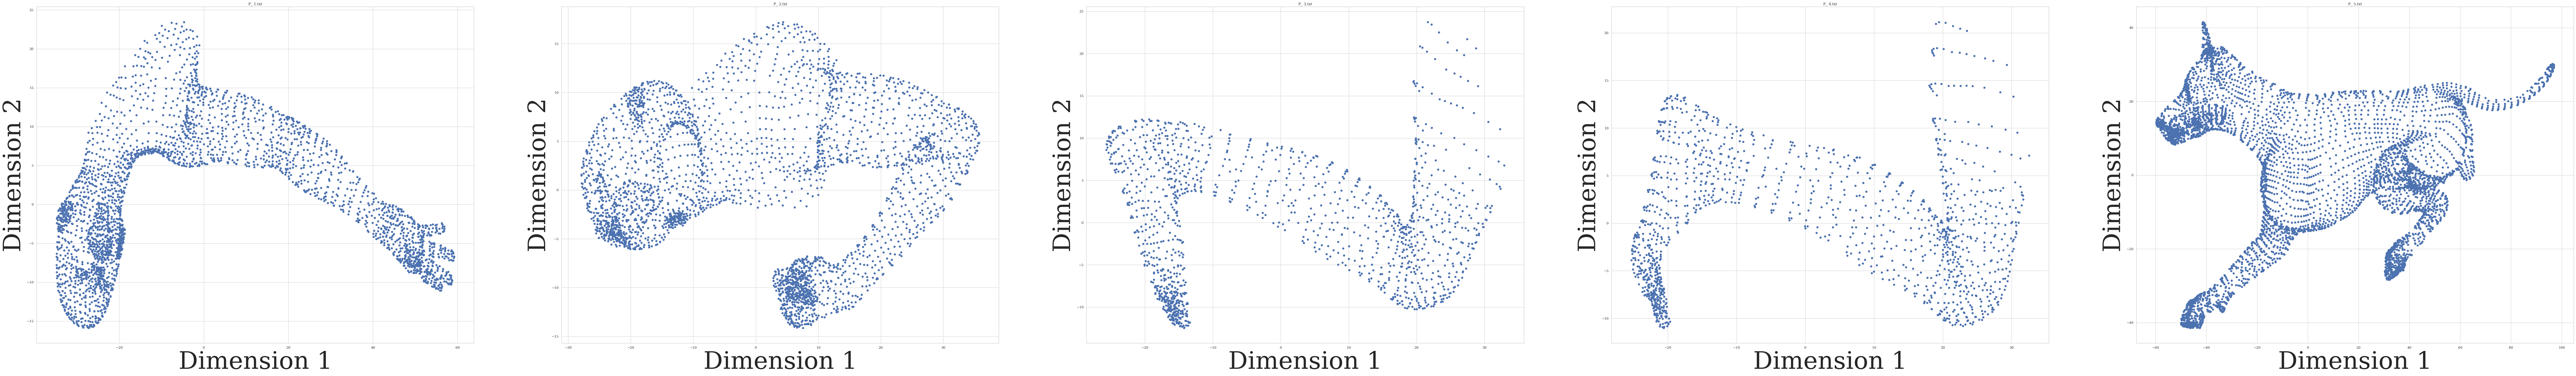

In [6]:
fig = plt.figure(figsize=(150 , 20))
subplot_index = 1

for point_cloud in [p1 , p2 , p3 , p4 , p5]:
  pca = PCA(n_components = 2)
  principal_components = pca . fit_transform(point_cloud , y = None)
  plt.subplot(1,5,subplot_index)
  plt.scatter( principal_components[: ,0] , principal_components[: ,1])
  plt.xlabel('Dimension 1', fontsize =80)
  plt.ylabel('Dimension 2', fontsize =80)
  plt.title('P_ '+ str(subplot_index) + '.txt')
  subplot_index += 1

## Question 3

Another classic example of PCA comes in image compression. The human eye cannot perceive the minute and frequent changes in the image. A typical smartphone camera takes a 5MP image on average. We will utilize PCA and analyze how the reduction in the no. of principal components or dimensions affects the visual quality of the image. Given an image, apply PCA to investigate the effect of reducing the dimensions on the visual quality of the image. You will use this image and show the analysis.


(870, 870, 3)


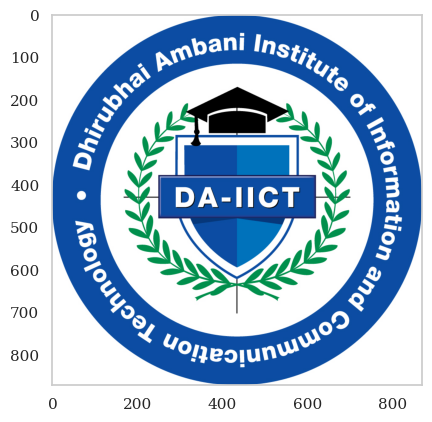

In [7]:
img = cv2.cvtColor(cv2.imread('DA-IICT-Emblem-Final Colour.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)
plt.grid(visible=False)
plt.imshow(img)

In [8]:
blue,green,red = cv2.split(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


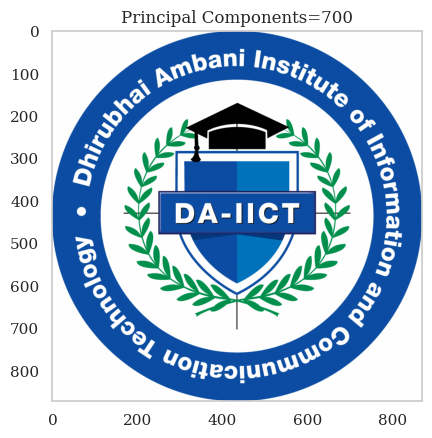

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


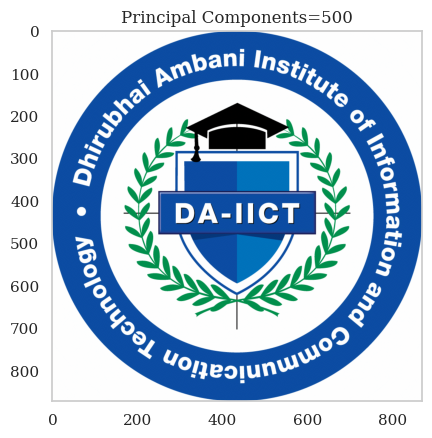

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


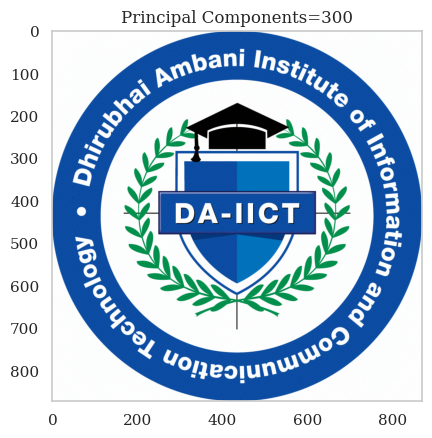

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


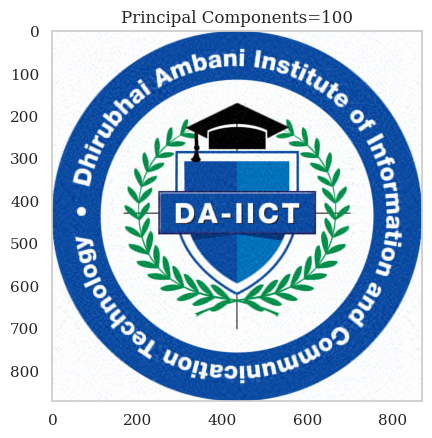

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


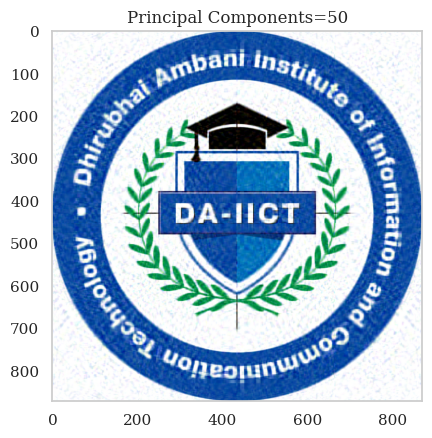

(870, 870, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


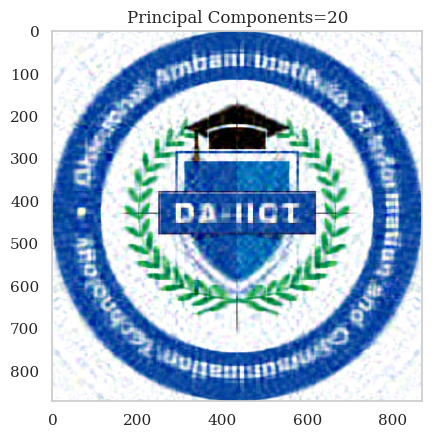

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


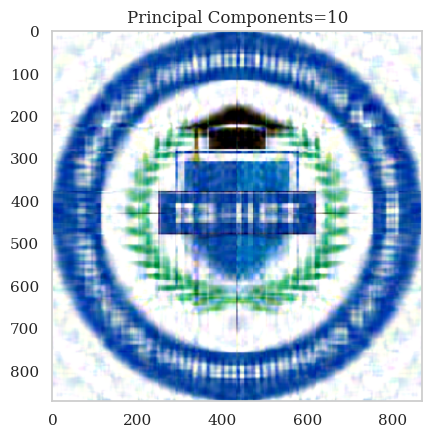

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


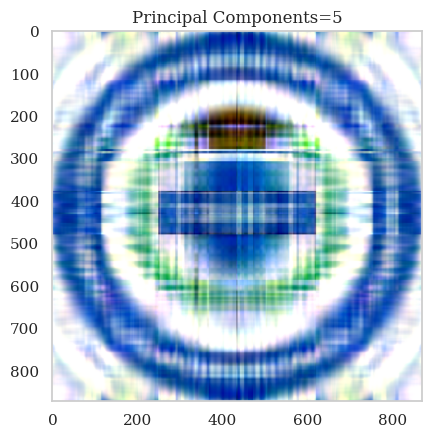

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(870, 870, 3)


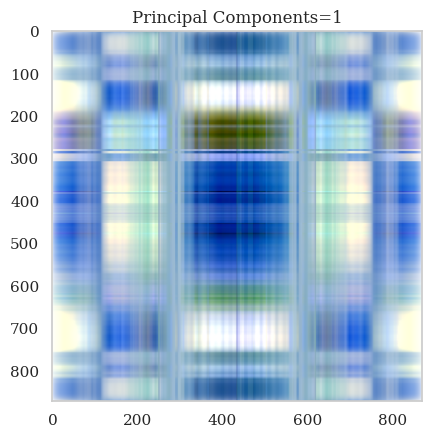

In [9]:
scaled_blue = blue/255
scaled_green = green/255
scaled_red = red/255
pcas=np.array([700,500,300,100,50,20,10,5,1])
variance_ratio_blue = []
variance_ratio_green = []
variance_ratio_red = []
for num in pcas:
  pb = PCA(n_components=num)
  pb.fit(scaled_blue)
  transformed_scaled_blue = pb.transform(scaled_blue)
  new_blue = pb.inverse_transform(transformed_scaled_blue)

  # Applying PCA on Green Color
  pg = PCA(n_components=num)
  pg.fit(scaled_green)
  transformed_scaled_green = pg.transform(scaled_green)
  new_green = pg.inverse_transform(transformed_scaled_green)

  # Applying PCA on Red Color
  pr = PCA(n_components=num)
  pr.fit(scaled_red)
  transformed_scaled_red = pr.transform(scaled_red)
  new_red = pr.inverse_transform(transformed_scaled_red)

  variance_ratio_blue.append(np.sum(pb.explained_variance_ratio_))
  variance_ratio_green.append(np.sum(pg.explained_variance_ratio_))
  variance_ratio_red.append(np.sum(pr.explained_variance_ratio_))

  new_image = cv2.merge((new_blue,new_green,new_red))
  plt.figure()
  print(new_image.shape)
  plt.title('Principal Components='+str(num))
  plt.imshow(new_image)
  plt.grid(visible=False)
  plt.show()
  

Result

The images for different value of principal components is as shown above.

Observation/Justification

As the number of principal components decreases, the quality of the image also decreases.

## Question 4

Load the Data matrix `faceimages.mat` given to you. There are 400 face images of
size 112×92.

a. Last column of the data is the class label. Column 1 to 10304 are 112×92 pixel. <br>
b. Each row represents one image.<br>
c. Construct the data matrix and Mean-center the data.<br>
d. Construct covariance matrix for the data.<br>
e. Solve eigenvalue problem to find projection matrix.<br>


- Find low dimensional representation of Face images<br>
- Draw energy curve of PCA for the given data<br>
- Reconstruct any face image with 5, 10, 50 and 100 principal components.<br>
- Compute the reconstruction error for the same.<br>

In [2]:
# Load data
filepath = "Q4_PCA_Face.mat"
with h5py.File(filepath, 'r') as file:
  data = np.array(file['data'])

# Construct data matrix
image_data = data[:-1, :]
labels = data[-1, :]

# Mean-center the data
mean_image_data = [np.mean(image) for image in image_data]
centered_image_data = image_data.T
centered_image_data = StandardScaler().fit_transform(centered_image_data)


In [3]:
# Construct covariance matrix
cov_matrix = np.cov(centered_image_data.T)
print("Covariance matrix:\n", cov_matrix)

# Solve eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues:\n", eigenvalues)

eigenvalues = np.flip(eigenvalues)
eigenvectors = np.flip(eigenvectors, axis=1)



Covariance matrix:
 [[ 1.00250627  1.00026036  0.99657517 ...  0.01468438 -0.0013777
  -0.03731771]
 [ 1.00026036  1.00250627  1.00066468 ...  0.01235262 -0.00374021
  -0.040178  ]
 [ 0.99657517  1.00066468  1.00250627 ...  0.01289766 -0.00293775
  -0.03801834]
 ...
 [ 0.01468438  0.01235262  0.01289766 ...  1.00250627  0.96132402
   0.89085115]
 [-0.0013777  -0.00374021 -0.00293775 ...  0.96132402  1.00250627
   0.96153802]
 [-0.03731771 -0.040178   -0.03801834 ...  0.89085115  0.96153802
   1.00250627]]
Eigenvalues:
 [-8.87808388e-13 -3.32578055e-13 -3.18571405e-13 ...  8.40791924e+02
  1.29336926e+03  1.66365294e+03]


Text(0, 0.5, 'Energy')

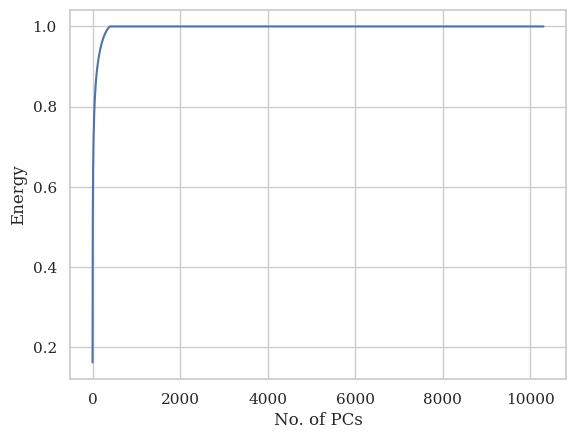

In [4]:
# Draw energy curve
variance_explained = [(i/sum(eigenvalues)) for i in eigenvalues]
cumulative_variance_explained = np.cumsum(variance_explained)
plt.plot(range(10304), cumulative_variance_explained[:])
plt.xlabel('No. of PCs')
plt.ylabel('Energy')



Text(0.5, 0.98, '16 random low dimensional representation out of 100 images')

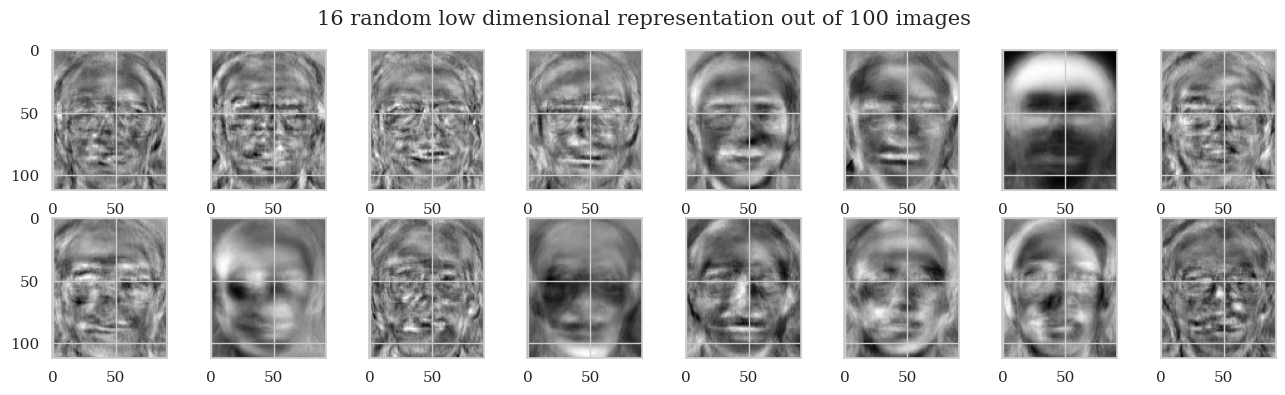

In [5]:
# Find low dimensional representation of Face images
fig, ax = plt.subplots(2,8, sharey = True, figsize = (16,4))
random_index = random.sample(range(100), 16)
for i in range(16):
  ax[int(i/8)][i%8].imshow(eigenvectors[:, random_index[i]].reshape(92,112).T,cmap='gray')
fig.suptitle('16 random low dimensional representation out of 100 images',fontsize=15)


In [6]:

# Function to reconstruct face image with n principal components
def reconstruct_image(n, image_index):
  eigenvectors_n = eigenvectors[:, :n]
  plt.subplot(121)
  plt.imshow(centered_image_data[image_index, :].reshape(92, 112).T, cmap='gray')
  plt.title('Original')
  reduced_image = centered_image_data[image_index].dot(eigenvectors_n)
  reconstructed_image = reduced_image.dot(eigenvectors_n.T)
  plt.subplot(122)
  plt.imshow(reconstructed_image[:].reshape(92, 112).T, cmap='gray')
  plt.title('Reconstructed')
  reconstruction_error = sqrt(mean_squared_error(centered_image_data[image_index], reconstructed_image))
  print('Reconstruction Error:', reconstruction_error)


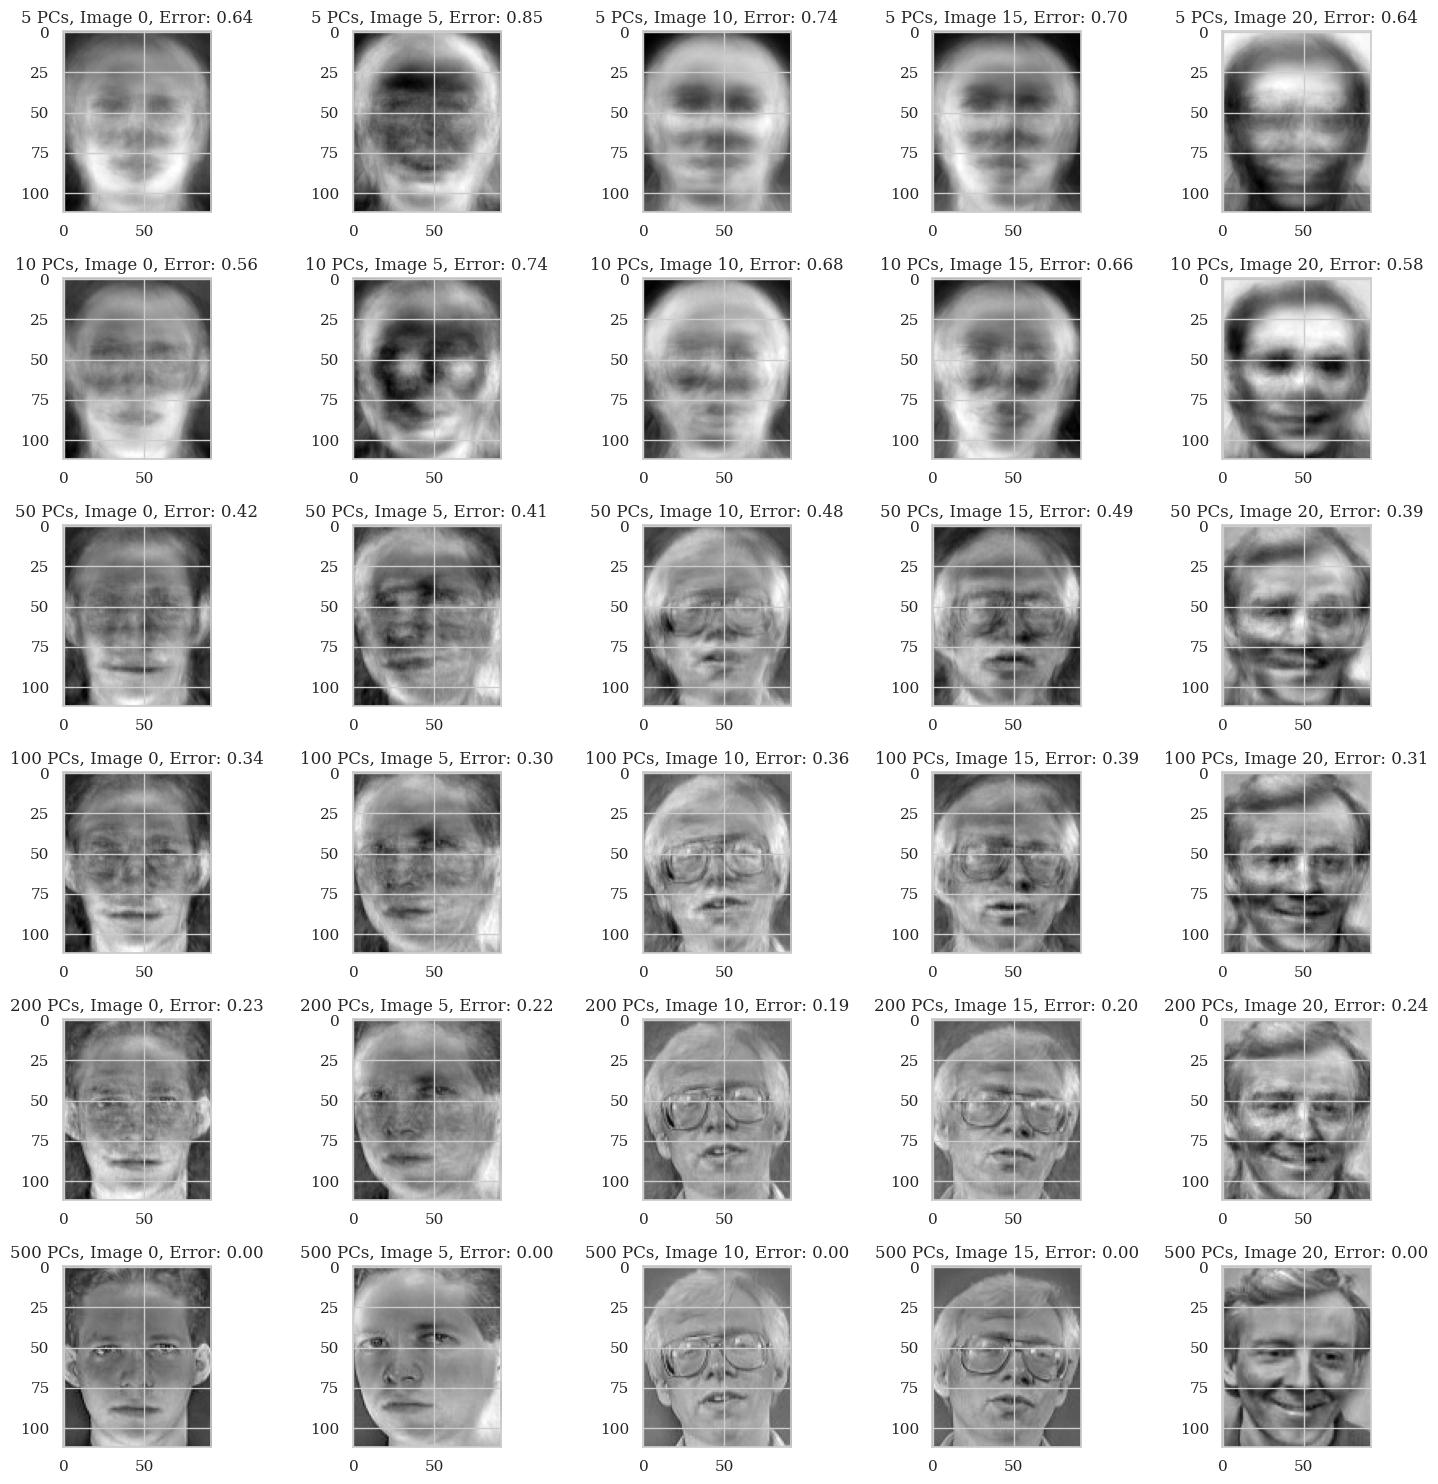

In [31]:
# Create a grid of different faces and their reconstructed images for different principal components
fig, axs = plt.subplots(6, 5, figsize=(15, 15))
for i, num_components in enumerate([5, 10, 50, 100,200,500]):
  for j in range(5):
    image_index = j * 5
    eigenvectors_n = eigenvectors[:, :num_components]
    reduced_image = centered_image_data[image_index].dot(eigenvectors_n)
    reconstructed_image = reduced_image.dot(eigenvectors_n.T)
    axs[i, j].imshow(reconstructed_image[:].reshape(92, 112).T, cmap='gray')
    reconstruction_error = sqrt(mean_squared_error(centered_image_data[image_index], reconstructed_image))
    axs[i, j].set_title(f'{num_components} PCs, Image {image_index}, Error: {reconstruction_error:.2f}')
plt.tight_layout()
plt.show()


## Question 5

Apply PCA on the MNIST dataset. Plot cumulative sum of variance with no of components and find the minimum no. of component for 85% variance.

In [30]:
# Fetching the MNIST Dataset
mnist_dataset = fetch_openml('mnist_784')
print(mnist_dataset.target)

# Creating Data & Target arrays From the dataset
X = pd.DataFrame(data = mnist_dataset.data, columns = mnist_dataset.feature_names)
y = mnist_dataset.target.astype('int64')

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [12]:
pca_model = PCA(n_components=200)
pca_model.fit(X)

PCA(n_components=200)

In [29]:
# Computing cumulative variance of the model
cumulative_variance = pca_model.explained_variance_ratio_.cumsum() * 100

58


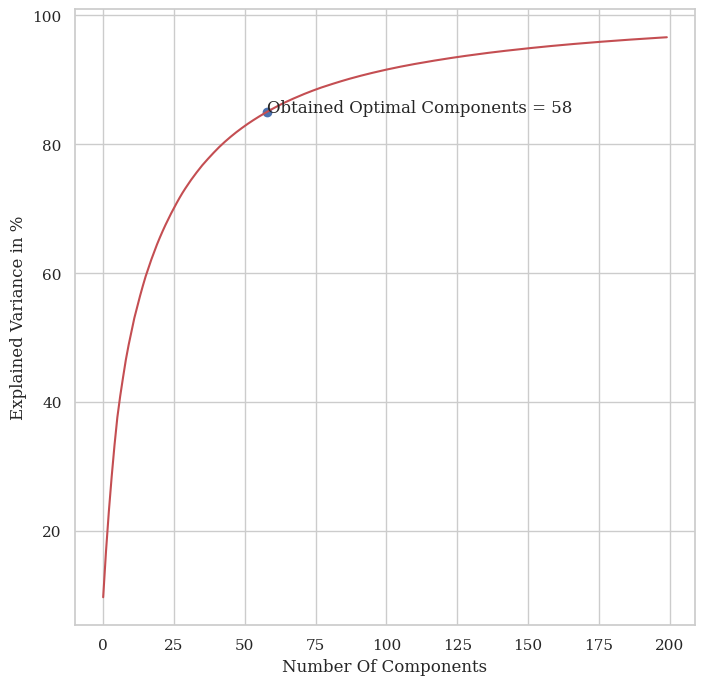

In [27]:
components = 0
for i in range(len(cumulative_variance)):
  if cumulative_variance[i] > 85:
    components = i
    break
print(components)

# Plotting graph
plt.figure(figsize = (8,8))
plt.plot(cumulative_variance, 'r')
plt.annotate('Obtained Optimal Components = 58', xy =(58, 85))
plt.scatter(components, 85, c ='b')
plt.xlabel('Number Of Components')
plt.ylabel('Explained Variance in %')
plt.show()

